In [61]:
import torch


class ParaSetting:
    def __init__(self):
        self.batch_size = 28
        self.label_size = 1
        self.epoch_num = 15
        self.sample_rate = 16000
        self.use_cuda = True
        self.cuda = torch.cuda.is_available() and self.use_cuda
        self.log_step = None
        self.dataset_len = 141
        self.dictionary = {
            0: 'baroque',
            1: 'classical',
            2: 'romantic',
            3: 'modernist',
        }
        self.r_dictionary = {
            0: 'baroque',
            1: 'classical',
            2: 'romantic',
            3: 'modernist',
        }

        # # On pure GTZAN dataset
        # self.TRAIN_DATA_PATH = '../datasets/train.h5'
        # self.VAL_DATA_PATH = '../datasets/valid.h5'
        # self.TEST_DATA_PATH = '../datasets/test.h5'

        # # On hybrid dataset
        # self.A_TRAIN_DATA_PATH = '../datasets/fin_train.h5'
        # self.A_VAL_DATA_PATH = '../datasets/fin_valid.h5'
        # self.A_TEST_DATA_PATH = '../datasets/fin_test.h5'

        # # On hybrid dataset
        # self.LA_TRAIN_DATA_PATH = '../datasets/l_train.h5'
        # self.LA_VAL_DATA_PATH = '../datasets/l_valid.h5'
        # self.LA_TEST_DATA_PATH = '../datasets/l_test.h5'

        self.MODEL_SAVE_FOlD = './model/'
        self.LOG_SAVE_FOLD = './log/'

        if self.cuda:
            self.kwargs = {'num_workers': 1, 'pin_memory': True}
        else:
            self.kwargs = {}

        self.learning_rate = 1e-5

    def __str__(self):
        out_string = "The Batch Size is {0}\n" \
                     "The Label Size is {1}\n" \
                     "The Epoch Num is {2}\n" \
                     "The Cuda is set to {3}\n" \
                     "The log step is {4}".format(self.batch_size,
                                                  self.label_size,
                                                  self.epoch_num,
                                                  self.cuda,
                                                  self.log_step)
        return out_string


Para = ParaSetting()

if __name__ == '__main__':
    print(Para)

The Batch Size is 28
The Label Size is 1
The Epoch Num is 15
The Cuda is set to False
The log step is None


In [62]:
# credit: https://github.com/XiplusChenyu/Musical-Genre-Classification/tree/master
import torch.nn as nn
import torch
torch.manual_seed(1)

class CnnModel(nn.Module):
    def __init__(self):
        super(CnnModel, self).__init__()
        cov1 = nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, stride=1, padding=1)
        torch.nn.init.xavier_uniform_(cov1.weight)
        self.convBlock1 = nn.Sequential(cov1,
                                        nn.BatchNorm2d(64),
                                        nn.ReLU(),
                                        nn.MaxPool2d(kernel_size=2))

        cov2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        torch.nn.init.xavier_uniform_(cov2.weight)
        self.convBlock2 = nn.Sequential(cov2,
                                        nn.BatchNorm2d(128),
                                        nn.ReLU(),
                                        nn.MaxPool2d(kernel_size=2))

        cov3 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        torch.nn.init.xavier_uniform_(cov3.weight)
        self.convBlock3 = nn.Sequential(cov3,
                                        nn.BatchNorm2d(256),
                                        nn.ReLU(),
                                        nn.MaxPool2d(kernel_size=2))

        cov4 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1)
        torch.nn.init.xavier_uniform_(cov4.weight)
        self.convBlock4 = nn.Sequential(cov4,
                                        nn.BatchNorm2d(512),
                                        nn.ReLU())

        self.fcBlock1 = nn.Sequential(nn.Linear(in_features=59904, out_features=1024),
                                      nn.ReLU(),
                                      nn.Dropout(0.5))

        self.fcBlock2 = nn.Sequential(nn.Linear(in_features=1024, out_features=256),
                                      nn.ReLU(),
                                      nn.Dropout(0.5))

        self.output = nn.Sequential(nn.Linear(in_features=256, out_features=4),
                                    nn.Softmax(dim=1))

    def forward(self, inp):
        # print(inp.shape)

        out = self.convBlock1(inp)
        out = self.convBlock2(out)
        out = self.convBlock3(out)
        out = self.convBlock4(out)

        out = out.view(out.size()[0], -1)
        out = self.fcBlock1(out)
        out = self.fcBlock2(out)
        out = self.output(out)
        return out

In [63]:
# credit: https://github.com/XiplusChenyu/Musical-Genre-Classification/tree/master

import torch.nn as nn
import torch
torch.manual_seed(1)

class RnnModel(nn.Module):
    def __init__(self):
        super(RnnModel, self).__init__()

        self.GruLayer = nn.GRU(input_size=13,
                               hidden_size=1024,
                               num_layers=2,
                               batch_first=True,
                               bidirectional=False)

        cov1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        torch.nn.init.xavier_uniform_(cov1.weight)
        self.convBlock1 = nn.Sequential(cov1,
                                        nn.BatchNorm2d(32),
                                        nn.ReLU(),
                                        nn.MaxPool2d(kernel_size=2))

        cov2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        torch.nn.init.xavier_uniform_(cov2.weight)
        self.convBlock2 = nn.Sequential(cov2,
                                        nn.BatchNorm2d(64),
                                        nn.ReLU(),
                                        nn.MaxPool2d(kernel_size=2))

        cov3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=1)
        torch.nn.init.xavier_uniform_(cov3.weight)
        self.convBlock3 = nn.Sequential(cov3,
                                        nn.BatchNorm2d(128),
                                        nn.ReLU(),
                                        nn.MaxPool2d(kernel_size=4))

        cov4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        torch.nn.init.xavier_uniform_(cov4.weight)
        self.convBlock4 = nn.Sequential(cov4,
                                        nn.BatchNorm2d(256),
                                        nn.ReLU(),
                                        nn.MaxPool2d(kernel_size=4))

        self.fcBlock1 = nn.Sequential(nn.Linear(in_features=53760, out_features=4096),
                                      nn.ReLU(),
                                      nn.Dropout(0.5))

        self.fcBlock2 = nn.Sequential(nn.Linear(in_features=4096, out_features=2048),
                                      nn.ReLU(),
                                      nn.Dropout(0.5))

        self.fcBlock3 = nn.Sequential(nn.Linear(in_features=2048, out_features=1024),
                                      nn.ReLU(),
                                      nn.Dropout(0.5))

        self.fcBlock4 = nn.Sequential(nn.Linear(in_features=1024, out_features=256),
                                      nn.ReLU(),
                                      nn.Dropout(0.5))

        self.output = nn.Sequential(nn.Linear(in_features=256, out_features=4),
                                    nn.Softmax(dim=1))

    def forward(self, inp):
        # _input (batch_size, 1, time, freq)
        inp = inp.contiguous().view(inp.size()[0], inp.size()[2], -1)
        out, _ = self.GruLayer(inp)
        out = out.contiguous().view(out.size()[0], 1, out.size()[1], out.size()[2])
        out = self.convBlock1(out)
        out = self.convBlock2(out)
        out = self.convBlock3(out)
        out = self.convBlock4(out)
        out = out.contiguous().view(out.size()[0], -1)
        out = self.fcBlock1(out)
        out = self.fcBlock2(out)
        out = self.fcBlock3(out)
        out = self.fcBlock4(out)
        out = self.output(out)
        return out

In [64]:
import numpy as np
from torch import nn


def accuracy_function(output, target):
    # shape: (batch, labels)
    f_output = output.cpu() if Para.cuda else output.clone()
    f_target = target.cpu() if Para.cuda else target.clone()

    output_res = f_output.detach().numpy()
    target_res = f_target.detach().numpy()
    predicted_index = np.argmax(output_res, axis=1)

    target_index = np.argmax(target_res, axis=1)

    # counter
    correct = np.sum(predicted_index == target_index)
    accuracy = correct / (output.shape[0])
    return accuracy


def matrix_tuple(output, target):
    f_output = output.cpu() if Para.cuda else output.clone()
    f_target = target.cpu() if Para.cuda else target.clone()

    output_res = f_output.detach().numpy()
    target_res = f_target.detach().numpy()
    predicted_index = np.argmax(output_res, axis=1)
    target_index = np.argmax(target_res, axis=1)
    result_list = [[int(predicted_index[i]), int(target_index[i])] for i in range(len(predicted_index))]
    return result_list


def bce_loss(output, target):
    loss_mlp = nn.BCELoss()
    loss = loss_mlp(output, target)
    return loss

In [65]:
import time
import numpy as np
import torch
import json
from torch import optim

def train(model, epoch, train_loader, optimizer, versatile=True):
    start_time = time.time()
    model = model.train()
    train_loss = 0.
    accuracy = 0.
    batch_num = len(train_loader)
    _index = 0

    for _index, data in enumerate(train_loader):
        spec_input, target = data['data'], data['tag']

        if Para.cuda:
            spec_input = spec_input.cuda()
            target = target.cuda()

        optimizer.zero_grad()
        predicted = model(spec_input)

        loss_value = bce_loss(predicted, target)
        accuracy_value = accuracy_function(predicted, target)

        loss_value.backward()
        optimizer.step()

        train_loss += loss_value.data.item()
        accuracy += accuracy_value

        if versatile:
            if (_index + 1) % Para.log_step == 0:
                elapsed = time.time() - start_time
                print('Epoch{:3d} | {:3d}/{:3d} batches | {:5.2f}ms/ batch | BCE: {:5.4f} | Accuracy: {:5.2f}% |'
                      .format(epoch, _index + 1, batch_num,
                              elapsed * 1000 / (_index + 1),
                              train_loss / (_index + 1),
                              accuracy * 100 / (_index + 1)))

    train_loss /= (_index + 1)
    accuracy /= (_index + 1)

    print('-' * 99)
    print('End of training epoch {:3d} | time: {:5.2f}s | BCE: {:5.4f} | Accuracy: {:5.2f}% |'
          .format(epoch, (time.time() - start_time),
                  train_loss, accuracy * 100))

    return train_loss, accuracy


def validate_test(model, epoch, use_loader):
    start_time = time.time()
    model = model.eval()
    v_loss = 0.
    accuracy = 0.
    data_loader_use = use_loader
    _index = 0
    for _index, data in enumerate(data_loader_use):
        spec_input, target = data['data'], data['tag']

        if Para.cuda:
            spec_input = spec_input.cuda()
            target = target.cuda()

        with torch.no_grad():

            predicted = model(spec_input)

            loss_value = bce_loss(predicted, target)
            accuracy_value = accuracy_function(predicted, target)

            v_loss += loss_value.data.item()
            accuracy += accuracy_value

    v_loss /= (_index + 1)
    accuracy /= (_index + 1)

    print('End of validation epoch {:3d} | time: {:5.2f}s | BCE: {:5.4f} | Accuracy: {:5.2f}% |'
          .format(epoch, (time.time() - start_time),
                  v_loss, accuracy * 100))
    print('-' * 99)

    return v_loss, accuracy


def record_matrix(model, use_loader, log_name):
    model = model.eval()
    data_loader_use = use_loader
    _index = 0
    result = list()
    for _index, data in enumerate(data_loader_use):
        spec_input, target = data['data'], data['tag']

        if Para.cuda:
            spec_input = spec_input.cuda()
            target = target.cuda()

        with torch.no_grad():

            predicted = model(spec_input)
            m_tuple_list = matrix_tuple(predicted, target)
            result += m_tuple_list

    print('End of Matrix Record, Save file in {0}'.format(Para.LOG_SAVE_FOLD + log_name))
    print('-' * 99)
    with open(Para.LOG_SAVE_FOLD + log_name, 'w+') as f:
        json.dump(result, f)
    return


def main_train(model, train_loader, valid_loader, log_name, save_name, lr=Para.learning_rate, epoch_num=Para.epoch_num):
    Para.dataset_len = len(train_loader)
    Para.log_step = len(train_loader) // 4
    optimizer = torch.optim.RMSprop(model.parameters(), lr=lr, weight_decay=0.007)
    scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.5)
    t_loss, t_accu, v_loss, v_accu = [], [], [], []

    decay_cnt = 0
    for epoch in range(1,  epoch_num + 1):
        if Para.cuda:
            model.cuda()
        train_loss, train_accuracy = train(model, epoch, train_loader, optimizer)
        validation_loss, validation_accuracy = validate_test(model, epoch, use_loader=valid_loader)

        t_loss.append(train_loss)
        t_accu.append(train_accuracy)

        v_loss.append(validation_loss)
        v_accu.append(validation_accuracy)

        # use accuracy to find the best model
        if np.max(t_accu) == t_accu[-1]:
            print('***Found Best Training Model***')
        if np.max(v_accu) == v_accu[-1]:
            with open(Para.MODEL_SAVE_FOlD + save_name, 'wb') as f:
                torch.save(model.cpu().state_dict(), f)
                print('***Best Validation Model Found and Saved***')

        print('-' * 99)

        # Use BCE loss value for learning rate scheduling
        decay_cnt += 1

        if np.min(t_loss) not in t_loss[-3:] and decay_cnt > 2:
            scheduler.step()
            decay_cnt = 0
            print('***Learning rate decreased***')
            print('-' * 99)

    build_dict = {
        "train_loss": t_loss,
        "train_accu": t_accu,
        "valid_loss": v_loss,
        "valid_accu": v_accu,
    }

    with open(Para.LOG_SAVE_FOLD + log_name, 'w+') as lf:
        json.dump(build_dict, lf)

    return build_dict

In [66]:

from torch.utils.data import Dataset, DataLoader
import h5py
import numpy as np
import torch

class TorchData(Dataset):

    def __init__(self, data_dict):
        """
        Take the h5py dataset
        """
        super(TorchData, self).__init__()
        self.tag = data_dict['labels']
        features_arr = []
        initial_shape = None
        for tensor_list in data_dict['features']:
            filtered_tensors = []
            for tensor in tensor_list:
                if initial_shape is None:
                    initial_shape = tensor.shape
                if tensor.shape[1] == initial_shape[1]:
                    filtered_tensors.append(tensor)
            features_arr.append(torch.stack(filtered_tensors))
        self.data = torch.stack(features_arr)
        self.len = self.data.shape[0]

    def __len__(self):
        return self.len

    def __getitem__(self, index):
        data = self.data[index].float()
        tag = self.tag[index].float()
        sample = {"data": data, "tag": tag}

        return sample


# define the data loaders
def torch_dataset_loader(dataset, batch_size, shuffle, kwargs):
    """
    take the h5py dataset
    """
    loader = DataLoader(TorchData(dataset),
                        batch_size=batch_size,
                        shuffle=shuffle,
                        **kwargs)
    return loader

In [67]:
import math
import random
def build_dataset(data_by_genre):
  data_dict = {
    'features': [],
    'labels': []
  }
  for key, val in data_by_genre.items():
    print(key)
    label_tensor = torch.tensor([1.0, 0.0, 0.0, 0.0])
    if (key == 'classical'):
      label_tensor = torch.tensor([0.0, 1.0, 0.0, 0.0])
    elif (key == 'romantic'):
      label_tensor = torch.tensor([0.0, 0.0, 1.0, 0.0])
    elif (key == 'modernist'):
      label_tensor = torch.tensor([0.0, 0.0, 0.0, 1.0])
    for artist_dict in val:
      features = artist_dict['features']
      labels = label_tensor.repeat(len(features), 1)
      artist_dict['labels'] = labels
      data_dict['features'].extend(features)
      data_dict['labels'].extend(labels)

  temp = list(zip(data_dict['features'], data_dict['labels']))
  random.shuffle(temp)
  data_dict['features'], data_dict['labels'] = zip(*temp)
  train_size = math.floor(len(data_dict['features']) * 0.8)
  val_size = math.floor(len(data_dict['features']) * 0.1)
  train_features = data_dict['features'][:train_size]
  val_features = data_dict['features'][train_size:(train_size + val_size)]
  test_features = data_dict['features'][(train_size + val_size):]
  train_labels = data_dict['labels'][:train_size]
  val_labels = data_dict['labels'][train_size:(train_size + val_size)]
  test_labels = data_dict['labels'][(train_size + val_size):]
  val_dict = {
    'features': val_features,
    'labels': val_labels
  }
  train_dict = {
    'features': train_features,
    'labels': train_labels
  }
  test_dict = {
    'features': test_features,
    'labels': test_labels
  }
  return train_dict, val_dict, test_dict

In [68]:
bach_dict_b = torch.load('features-BAROQUE-BACH-SAMPLES-AUGMENTED-features.pt')
handel_dict_b = torch.load('features-BAROQUE-HANDEL-SAMPLES-AUGMENTED-features.pt')
purcell_dict_b = torch.load('features-BAROQUE-PURCELL-SAMPLES-AUGMENTED-features.pt')
telemann_dict_b = torch.load('features-BAROQUE-TELEMANN-SAMPLES-AUGMENTED-features.pt')
vivaldi_dict_b = torch.load('features-BAROQUE-VIVALDI-SAMPLES-AUGMENTED-features.pt')
beet_dict_c = torch.load('features-CLASSICAL-BEETHOVEN-SAMPLES-AUGMENTED-features.pt')
bocc_dict_c = torch.load('features-CLASSICAL-BOCCHERINI-SAMPLES-AUGMENTED-features.pt')
haydn_dict_c = torch.load('features-CLASSICAL-HAYDN-SAMPLES-AUGMENTED-features.pt')
hummel_dict_c = torch.load('features-CLASSICAL-HUMMEL-SAMPLES-AUGMENTED-features.pt')
mozart_dict_c = torch.load('features-CLASSICAL-MOZART-SAMPLES-AUGMENTED-features.pt')
shubert_dict_c = torch.load('features-CLASSICAL-SCHUBERT-SAMPLES-AUGMENTED-features.pt')
debussy_dict_m = torch.load('features-MODERNIST-DEBUSSY-SAMPLES-AUGMENTED-features.pt')
glass_dict_m = torch.load('features-MODERNIST-GLASS-SAMPLES-AUGMENTED-features.pt')
ravel_dict_m = torch.load('features-MODERNIST-RAVEL-SAMPLES-AUGMENTED-features.pt')
schoen_dict_m = torch.load('features-MODERNIST-SCHOENBERG-SAMPLES-AUGMENTED-features.pt')
schost_dict_m = torch.load('features-MODERNIST-SCHOENBERG-SAMPLES-AUGMENTED-features.pt')
strav_dict_m = torch.load('features-MODERNIST-SCHOENBERG-SAMPLES-AUGMENTED-features.pt')
brahms_dict_r = torch.load('features-ROMANTIC-BRAHMS-SAMPLES-AUGMENTED-features.pt')
chopin_dict_r = torch.load('features-ROMANTIC-CHOPIN-SAMPLES-AUGMENTED-features.pt')
dvorak_dict_r = torch.load('features-ROMANTIC-DVORAK-SAMPLES-AUGMENTED-features.pt')
liszt_dict_r = torch.load('features-ROMANTIC-LISZT-SAMPLES-AUGMENTED-features.pt')
mend_dict_r = torch.load('features-ROMANTIC-MENDELSSOHN-SAMPLES-AUGMENTED-features.pt')
shum_dict_r = torch.load('features-ROMANTIC-SCHUMANN-SAMPLES-AUGMENTED-features.pt')
tchai_dict_r = torch.load('features-ROMANTIC-TCHAIKOVSKY-SAMPLES-AUGMENTED-features.pt')
data_by_genre = {
  'baroque': [
    bach_dict_b,
    handel_dict_b,
    purcell_dict_b,
    telemann_dict_b,
    vivaldi_dict_b,
  ],
  'classical': [
    beet_dict_c,
    bocc_dict_c,
    haydn_dict_c,
    hummel_dict_c,
    mozart_dict_c,
    shubert_dict_c,
  ],
  'modernist': [
    debussy_dict_m,
    glass_dict_m,
    ravel_dict_m,
    schoen_dict_m,
    schost_dict_m,
    strav_dict_m
  ],
  'romantic': [
    brahms_dict_r,
    chopin_dict_r,
    dvorak_dict_r,
    liszt_dict_r,
    mend_dict_r,
    shum_dict_r,
    tchai_dict_r,
  ]
}
train_dict, val_dict, test_dict = build_dataset(data_by_genre)
train_loader = torch_dataset_loader(train_dict, Para.batch_size, True, Para.kwargs)
val_loader = torch_dataset_loader(val_dict, Para.batch_size, True, Para.kwargs)
test_loader = torch_dataset_loader(val_dict, Para.batch_size, True, Para.kwargs)

baroque
classical
modernist
romantic


In [69]:
CNN = CnnModel()
RNN = RnnModel()

In [70]:
res = main_train(model=CNN, 
                 train_loader=train_loader,
                 valid_loader=val_loader,
                 log_name='CnnModel.json',
                 save_name='CnnModel.pt',
                 lr=Para.learning_rate,
                 epoch_num=Para.epoch_num)

Epoch  1 |  96/386 batches | 14818.58ms/ batch | BCE: 0.5683 | Accuracy: 30.62% |
Epoch  1 | 192/386 batches | 9784.03ms/ batch | BCE: 0.5548 | Accuracy: 33.74% |
Epoch  1 | 288/386 batches | 22999.83ms/ batch | BCE: 0.5464 | Accuracy: 35.53% |
Epoch  1 | 384/386 batches | 26113.34ms/ batch | BCE: 0.5422 | Accuracy: 36.59% |
---------------------------------------------------------------------------------------------------
End of training epoch   1 | time: 10029.14s | BCE: 0.5419 | Accuracy: 36.64% |
End of validation epoch   1 | time: 165.21s | BCE: 0.5119 | Accuracy: 40.94% |
---------------------------------------------------------------------------------------------------
***Found Best Training Model***
***Best Validation Model Found and Saved***
---------------------------------------------------------------------------------------------------
Epoch  2 |  96/386 batches | 40828.27ms/ batch | BCE: 0.5247 | Accuracy: 39.06% |
Epoch  2 | 192/386 batches | 48472.06ms/ batch | BCE: 0.5

In [71]:
# res = main_train(model=RNN, 
#                  train_loader=train_loader,
#                  valid_loader=val_loader,
#                  log_name='RnnModel.json',
#                  save_name='RnnModel.pt',
#                  lr=Para.learning_rate,
#                  epoch_num=Para.epoch_num)

In [72]:
import matplotlib.pyplot as plt
import json
import numpy as np
import seaborn as sn
import pandas as pd

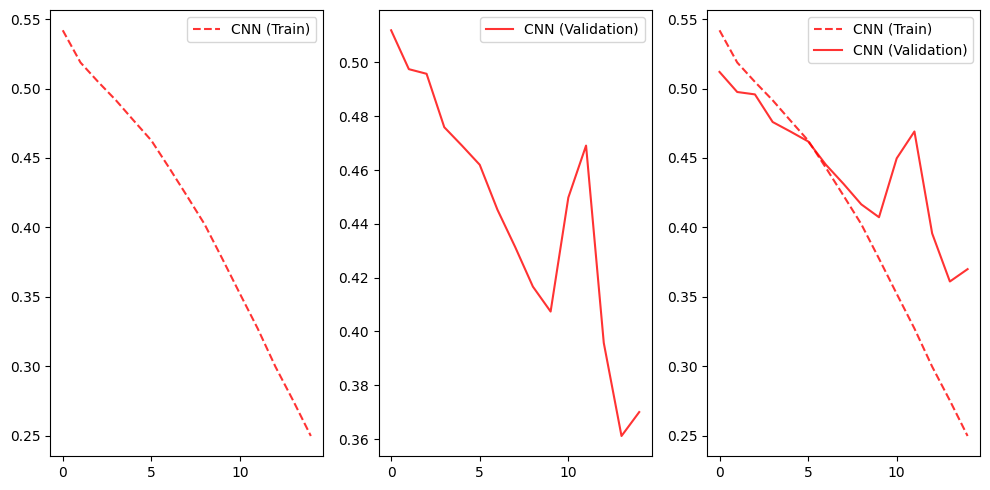

In [73]:
with open(Para.LOG_SAVE_FOLD + 'CnnModel.json', 'r') as f:
    cnn = json.load(f)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(cnn['train_loss'], '--', color=(1,0,0,0.8), label='CNN (Train)')
# plt.plot(crnn['train_loss'], '--', color=(0,0,1,0.8), label='CRNN-I (Train)')
# plt.plot(lcrnn['train_loss'], '--', color=(0,0,0,0.9), label='CRNN-II (Train)')
plt.legend(loc="upper right")
plt.subplot(1, 3, 2)
plt.plot(cnn['valid_loss'], '-', color=(1,0,0,0.8), label='CNN (Validation)')
# plt.plot(crnn['valid_loss'], '-', color=(0,0,1,0.8), label='CRNN-I (Validation)')
# plt.plot(lcrnn['valid_loss'], '-', color=(0,0,0,0.9), label='CRNN-II (Validation)')
plt.legend(loc="upper right")
plt.subplot(1, 3, 3)
plt.plot(cnn['train_loss'], '--', color=(1,0,0,0.8), label='CNN (Train)')
# plt.plot(crnn['train_loss'], '--', color=(0,0,1,0.8), label='CRNN-I (Train)')
# plt.plot(lcrnn['train_loss'], '--', color=(0,0,0,0.9), label='CRNN-II (Train)')
plt.plot(cnn['valid_loss'], '-', color=(1,0,0,0.8), label='CNN (Validation)')
# plt.plot(crnn['valid_loss'], '-', color=(0,0,1,0.8), label='CRNN-I (Validation)')
# plt.plot(lcrnn['valid_loss'], '-', color=(0,0,0,0.9), label='CRNN-II (Validation)')
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

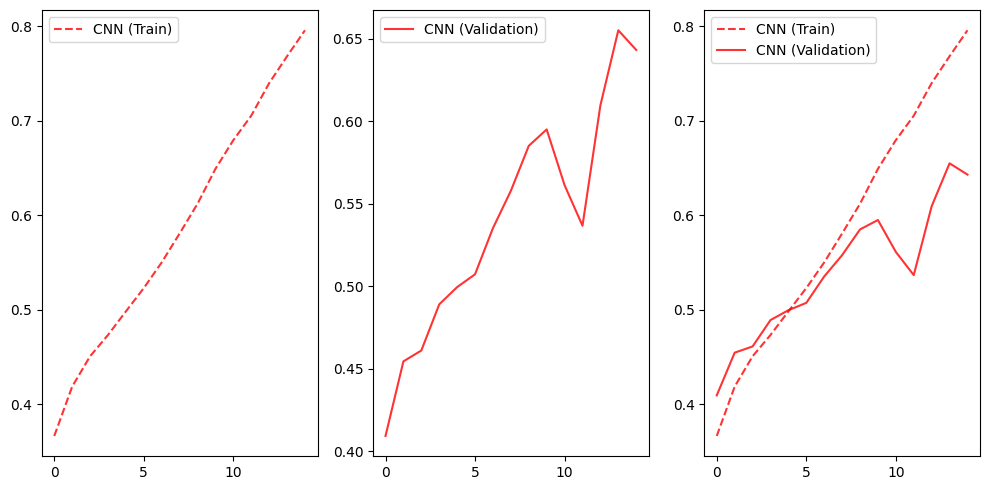

In [74]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(cnn['train_accu'], '--', color=(1,0,0,0.8), label='CNN (Train)')
# plt.plot(crnn['train_accu'], '--', color=(0,0,1,0.8), label='CRNN-I (Train)')
# plt.plot(lcrnn['train_accu'], '--', color=(0,0,0,0.9), label='CRNN-II (Train)')
plt.legend(loc="best")
plt.subplot(1, 3, 2)
plt.plot(cnn['valid_accu'], '-', color=(1,0,0,0.8), label='CNN (Validation)')
# plt.plot(crnn['valid_accu'], '-', color=(0,0,1,0.8), label='CRNN-I (Validation)')
# plt.plot(lcrnn['valid_accu'], '-', color=(0,0,0,0.9), label='CRNN-II (Validation)')
plt.legend(loc="best")
plt.subplot(1, 3, 3)
plt.plot(cnn['train_accu'], '--', color=(1,0,0,0.8), label='CNN (Train)')
# plt.plot(crnn['train_accu'], '--', color=(0,0,1,0.8), label='CRNN-I (Train)')
# plt.plot(lcrnn['train_accu'], '--', color=(0,0,0,0.9), label='CRNN-II (Train)')
plt.plot(cnn['valid_accu'], '-', color=(1,0,0,0.8), label='CNN (Validation)')
# plt.plot(crnn['valid_accu'], '-', color=(0,0,1,0.8), label='CRNN-I (Validation)')
# plt.plot(lcrnn['valid_accu'], '-', color=(0,0,0,0.9), label='CRNN-II (Validation)')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [103]:
base_bach_dict_b = torch.load('features-BAROQUE-BACH-SAMPLES-features.pt')
base_handel_dict_b = torch.load('features-BAROQUE-HANDEL-SAMPLES-features.pt')
base_purcell_dict_b = torch.load('features-BAROQUE-PURCELL-SAMPLES-features.pt')
base_telemann_dict_b = torch.load('features-BAROQUE-TELEMANN-SAMPLES-features.pt')
base_vivaldi_dict_b = torch.load('features-BAROQUE-VIVALDI-SAMPLES-features.pt')
base_beet_dict_c = torch.load('features-CLASSICAL-BEETHOVEN-SAMPLES-features.pt')
base_bocc_dict_c = torch.load('features-CLASSICAL-BOCCHERINI-SAMPLES-features.pt')
base_haydn_dict_c = torch.load('features-CLASSICAL-HAYDN-SAMPLES-features.pt')
base_hummel_dict_c = torch.load('features-CLASSICAL-HUMMEL-SAMPLES-features.pt')
base_mozart_dict_c = torch.load('features-CLASSICAL-MOZART-SAMPLES-features.pt')
base_shubert_dict_c = torch.load('features-CLASSICAL-SCHUBERT-SAMPLES-features.pt')
base_debussy_dict_m = torch.load('features-MODERNIST-DEBUSSY-SAMPLES-features.pt')
base_glass_dict_m = torch.load('features-MODERNIST-GLASS-SAMPLES-features.pt')
base_ravel_dict_m = torch.load('features-MODERNIST-RAVEL-SAMPLES-features.pt')
base_schoen_dict_m = torch.load('features-MODERNIST-SCHOENBERG-SAMPLES-features.pt')
base_schost_dict_m = torch.load('features-MODERNIST-SCHOENBERG-SAMPLES-features.pt')
base_strav_dict_m = torch.load('features-MODERNIST-SCHOENBERG-SAMPLES-features.pt')
base_brahms_dict_r = torch.load('features-ROMANTIC-BRAHMS-SAMPLES-features.pt')
base_chopin_dict_r = torch.load('features-ROMANTIC-CHOPIN-SAMPLES-features.pt')
base_dvorak_dict_r = torch.load('features-ROMANTIC-DVORAK-SAMPLES-features.pt')
base_liszt_dict_r = torch.load('features-ROMANTIC-LISZT-SAMPLES-features.pt')
base_mend_dict_r = torch.load('features-ROMANTIC-MENDELSSOHN-SAMPLES-features.pt')
base_shum_dict_r = torch.load('features-ROMANTIC-SCHUMANN-SAMPLES-features.pt')
base_tchai_dict_r = torch.load('features-ROMANTIC-TCHAIKOVSKY-SAMPLES-features.pt')
base_data_by_genre = {
  'baroque': [
    base_bach_dict_b,
    base_handel_dict_b,
    base_purcell_dict_b,
    base_telemann_dict_b,
    base_vivaldi_dict_b,
  ],
  'classical': [
    base_beet_dict_c,
    base_bocc_dict_c,
    base_haydn_dict_c,
    base_hummel_dict_c,
    base_mozart_dict_c,
    base_shubert_dict_c,
  ],
  'modernist': [
    base_debussy_dict_m,
    base_glass_dict_m,
    base_ravel_dict_m,
    base_schoen_dict_m,
    base_schost_dict_m,
    base_strav_dict_m
  ],
  'romantic': [
    base_brahms_dict_r,
    base_chopin_dict_r,
    base_dvorak_dict_r,
    base_liszt_dict_r,
    base_mend_dict_r,
    base_shum_dict_r,
    base_tchai_dict_r,
  ]
}
base_train_dict, base_val_dict, base_test_dict = build_dataset(base_data_by_genre)
base_train_loader = torch_dataset_loader(base_train_dict, Para.batch_size, True, Para.kwargs)
base_val_loader = torch_dataset_loader(base_val_dict, Para.batch_size, True, Para.kwargs)
base_test_loader = torch_dataset_loader(base_test_dict, Para.batch_size, True, Para.kwargs)

baroque
classical
modernist
romantic


In [110]:
CNN_base = CnnModel()

In [111]:
base_res = main_train(model=CNN_base, 
                 train_loader=base_train_loader,
                 valid_loader=base_val_loader,
                 log_name='CnnModelBase.json',
                 save_name='CnnModelBase.pt',
                 lr=Para.learning_rate,
                 epoch_num=Para.epoch_num)

Epoch  1 |  28/112 batches | 845.80ms/ batch | BCE: 0.5745 | Accuracy: 32.78% |
Epoch  1 |  56/112 batches | 920.07ms/ batch | BCE: 0.5625 | Accuracy: 35.20% |
Epoch  1 |  84/112 batches | 907.54ms/ batch | BCE: 0.5541 | Accuracy: 35.59% |
Epoch  1 | 112/112 batches | 926.97ms/ batch | BCE: 0.5499 | Accuracy: 36.12% |
---------------------------------------------------------------------------------------------------
End of training epoch   1 | time: 103.82s | BCE: 0.5499 | Accuracy: 36.12% |
End of validation epoch   1 | time:  4.81s | BCE: 0.5036 | Accuracy: 45.35% |
---------------------------------------------------------------------------------------------------
***Found Best Training Model***
***Best Validation Model Found and Saved***
---------------------------------------------------------------------------------------------------
Epoch  2 |  28/112 batches | 1019.95ms/ batch | BCE: 0.5344 | Accuracy: 38.39% |
Epoch  2 |  56/112 batches | 926.07ms/ batch | BCE: 0.5260 | Accurac

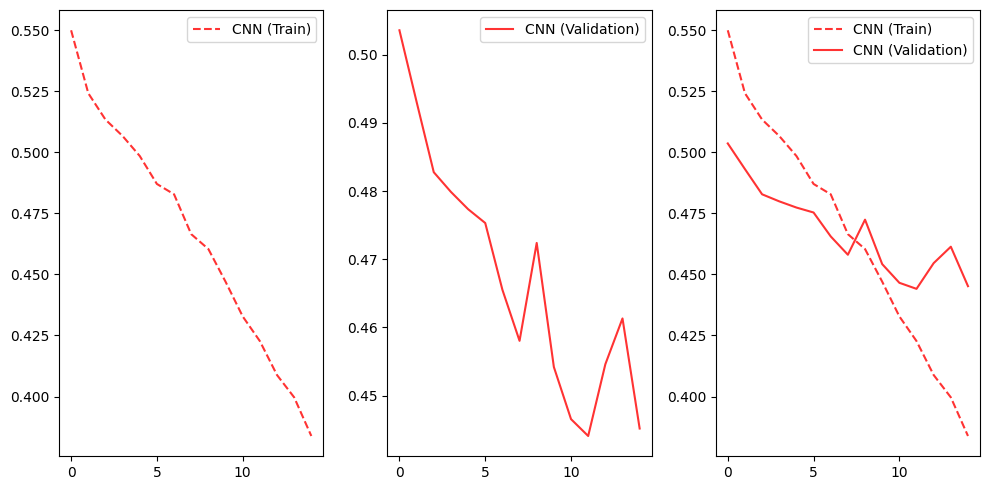

In [112]:
with open(Para.LOG_SAVE_FOLD + 'CnnModelBase.json', 'r') as f:
    cnn_base = json.load(f)

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(cnn_base['train_loss'], '--', color=(1,0,0,0.8), label='CNN (Train)')
# plt.plot(crnn['train_loss'], '--', color=(0,0,1,0.8), label='CRNN-I (Train)')
# plt.plot(lcrnn['train_loss'], '--', color=(0,0,0,0.9), label='CRNN-II (Train)')
plt.legend(loc="upper right")
plt.subplot(1, 3, 2)
plt.plot(cnn_base['valid_loss'], '-', color=(1,0,0,0.8), label='CNN (Validation)')
# plt.plot(crnn['valid_loss'], '-', color=(0,0,1,0.8), label='CRNN-I (Validation)')
# plt.plot(lcrnn['valid_loss'], '-', color=(0,0,0,0.9), label='CRNN-II (Validation)')
plt.legend(loc="upper right")
plt.subplot(1, 3, 3)
plt.plot(cnn_base['train_loss'], '--', color=(1,0,0,0.8), label='CNN (Train)')
# plt.plot(crnn['train_loss'], '--', color=(0,0,1,0.8), label='CRNN-I (Train)')
# plt.plot(lcrnn['train_loss'], '--', color=(0,0,0,0.9), label='CRNN-II (Train)')
plt.plot(cnn_base['valid_loss'], '-', color=(1,0,0,0.8), label='CNN (Validation)')
# plt.plot(crnn['valid_loss'], '-', color=(0,0,1,0.8), label='CRNN-I (Validation)')
# plt.plot(lcrnn['valid_loss'], '-', color=(0,0,0,0.9), label='CRNN-II (Validation)')
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

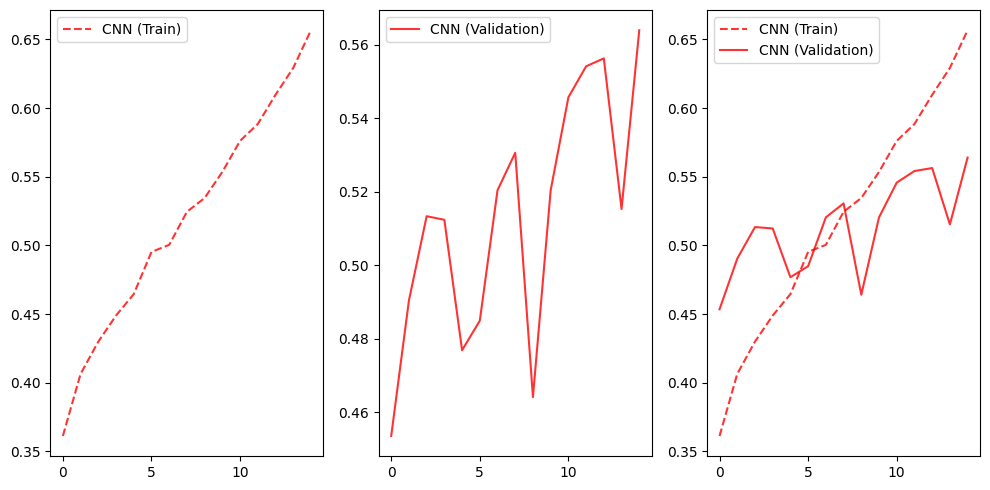

In [113]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(cnn_base['train_accu'], '--', color=(1,0,0,0.8), label='CNN (Train)')
# plt.plot(crnn['train_accu'], '--', color=(0,0,1,0.8), label='CRNN-I (Train)')
# plt.plot(lcrnn['train_accu'], '--', color=(0,0,0,0.9), label='CRNN-II (Train)')
plt.legend(loc="best")
plt.subplot(1, 3, 2)
plt.plot(cnn_base['valid_accu'], '-', color=(1,0,0,0.8), label='CNN (Validation)')
# plt.plot(crnn['valid_accu'], '-', color=(0,0,1,0.8), label='CRNN-I (Validation)')
# plt.plot(lcrnn['valid_accu'], '-', color=(0,0,0,0.9), label='CRNN-II (Validation)')
plt.legend(loc="best")
plt.subplot(1, 3, 3)
plt.plot(cnn_base['train_accu'], '--', color=(1,0,0,0.8), label='CNN (Train)')
# plt.plot(crnn['train_accu'], '--', color=(0,0,1,0.8), label='CRNN-I (Train)')
# plt.plot(lcrnn['train_accu'], '--', color=(0,0,0,0.9), label='CRNN-II (Train)')
plt.plot(cnn_base['valid_accu'], '-', color=(1,0,0,0.8), label='CNN (Validation)')
# plt.plot(crnn['valid_accu'], '-', color=(0,0,1,0.8), label='CRNN-I (Validation)')
# plt.plot(lcrnn['valid_accu'], '-', color=(0,0,0,0.9), label='CRNN-II (Validation)')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

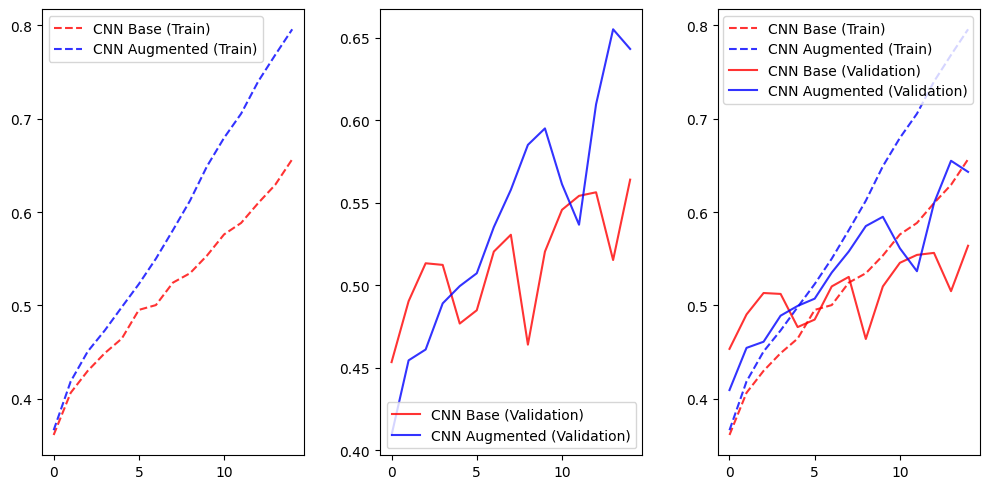

In [114]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(cnn_base['train_accu'], '--', color=(1,0,0,0.8), label='CNN Base (Train)')
plt.plot(cnn['train_accu'], '--', color=(0,0,1,0.8), label='CNN Augmented (Train)')
# plt.plot(lcrnn['train_accu'], '--', color=(0,0,0,0.9), label='CRNN-II (Train)')
plt.legend(loc="best")
plt.subplot(1, 3, 2)
plt.plot(cnn_base['valid_accu'], '-', color=(1,0,0,0.8), label='CNN Base (Validation)')
plt.plot(cnn['valid_accu'], '-', color=(0,0,1,0.8), label='CNN Augmented (Validation)')
# plt.plot(lcrnn['valid_accu'], '-', color=(0,0,0,0.9), label='CRNN-II (Validation)')
plt.legend(loc="best")
plt.subplot(1, 3, 3)
plt.plot(cnn_base['train_accu'], '--', color=(1,0,0,0.8), label='CNN Base (Train)')
plt.plot(cnn['train_accu'], '--', color=(0,0,1,0.8), label='CNN Augmented (Train)')
# plt.plot(lcrnn['train_accu'], '--', color=(0,0,0,0.9), label='CRNN-II (Train)')
plt.plot(cnn_base['valid_accu'], '-', color=(1,0,0,0.8), label='CNN Base (Validation)')
plt.plot(cnn['valid_accu'], '-', color=(0,0,1,0.8), label='CNN Augmented (Validation)')
# plt.plot(lcrnn['valid_accu'], '-', color=(0,0,0,0.9), label='CRNN-II (Validation)')
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [115]:

def record_matrix(model, use_loader, log_name):
    model = model.eval()
    data_loader_use = use_loader
    _index = 0
    result = list()
    for _index, data in enumerate(data_loader_use):
        spec_input, target = data['data'], data['tag']

        if Para.cuda:
            spec_input = spec_input.cuda()
            target = target.cuda()

        with torch.no_grad():

            predicted = model(spec_input)
            m_tuple_list = matrix_tuple(predicted, target)
            result += m_tuple_list

    print('End of Matrix Record, Save file in {0}'.format(Para.LOG_SAVE_FOLD + log_name))
    print('-' * 99)
    with open(Para.LOG_SAVE_FOLD + log_name, 'w+') as f:
        json.dump(result, f)
    return

In [117]:
CNN.load_state_dict(torch.load(Para.MODEL_SAVE_FOlD + 'CnnModel.pt'))
record_matrix(model=CNN, use_loader=test_loader, log_name='CnnMatrix.json')

End of Matrix Record, Save file in ./log/CnnMatrix.json
---------------------------------------------------------------------------------------------------


In [118]:
CNN_base.load_state_dict(torch.load(Para.MODEL_SAVE_FOlD + 'CnnModelBase.pt'))
record_matrix(model=CNN_base, use_loader=base_test_loader, log_name='CnnMatrixBase.json')

End of Matrix Record, Save file in ./log/CnnMatrixBase.json
---------------------------------------------------------------------------------------------------


In [119]:
def get_test_acc(test_loader, model):
  test_accuracy = validate_test(model, 15, use_loader=test_loader)
  return test_accuracy

In [120]:
cnn_base_ta = get_test_acc(base_test_loader, CNN_base)
cnn_aug_ta = get_test_acc(test_loader, CNN)

print("Base Test acc: " + str(cnn_base_ta))
print("Augmented Test acc: " + str(cnn_aug_ta))

End of validation epoch  15 | time:  4.82s | BCE: 0.4939 | Accuracy: 49.74% |
---------------------------------------------------------------------------------------------------
End of validation epoch  15 | time: 18.29s | BCE: 0.3606 | Accuracy: 65.50% |
---------------------------------------------------------------------------------------------------
Base Test acc: (0.4939317341361727, 0.4974489795918367)
Augmented Test acc: (0.36058290333163984, 0.6550048590864918)


In [121]:
cnn_m, cnn_base_m = np.zeros((4, 4)), np.zeros((4, 4))

In [122]:
with open(Para.LOG_SAVE_FOLD + 'CnnMatrix.json', 'r') as f:
    cnn_l = json.load(f)
with open(Para.LOG_SAVE_FOLD + 'CnnMatrixBase.json', 'r') as f:
    cnn_base_l = json.load(f)

In [123]:
for point in cnn_l:
    i, j = point
    cnn_m[i][j] += 1
    
for point in cnn_base_l:
    i, j = point
    cnn_base_m[i][j] += 1

In [124]:
cnn_m/=sum(cnn_m)
cnn_base_m/=sum(cnn_base_m)

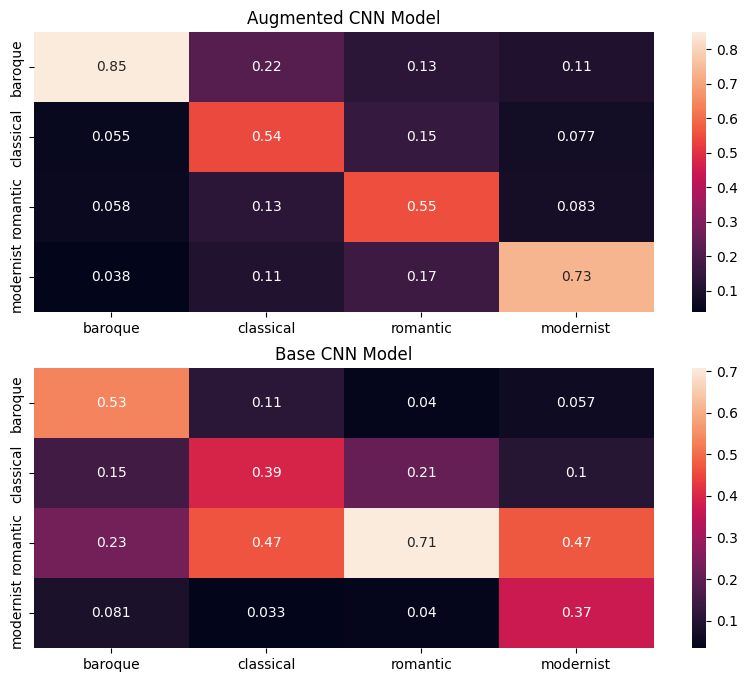

In [125]:
cnn_m = pd.DataFrame(cnn_m, index = [Para.dictionary.get(i) for i in range(4)],
                  columns = [Para.dictionary.get(i) for i in range(4)],)
cnn_base_m = pd.DataFrame(cnn_base_m, index = [Para.dictionary.get(i) for i in range(4)],
                  columns = [Para.dictionary.get(i) for i in range(4)],)
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.title('Augmented CNN Model')
sn.heatmap(cnn_m, annot=True,)
plt.subplot(2, 1, 2)
plt.title('Base CNN Model')
sn.heatmap(cnn_base_m, annot=True,)
plt.savefig('matrix.png')